# Importing Data
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/import-data.ipynb)  
*This code is made available under an MIT License, included as the LICENSE file in this repository.*

This notebook walks through the process of importing data into Python using 
weather station data from the Colorado Springs weather station.

# 1. Importing the data

Now we have the data on our computer and are ready to import it into a Python
data structure. To begin, we need to import relevant package(s).

In [36]:
# Import relevant packages based on class discussion here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now we make variables that contain the path (location) of our data. File
paths are input as strings. In general, it's best to keep the path and the 
filename separate as this allows us to import multiple files more easily. This
is not relevant for this script, but builds good habits for the future!


In [5]:
#  Make a variable with the path to your folder and another variable with the
#  filename here.
path_data = '/Users/danielhueholt/Data/ev228_data/station/'
fn_data = 'COS-Airport_maxT-minT-precip-snow_194801-202212.csv'

We are now ready to import the data into Python!

In [ ]:
#  Write the command to import your data here
df_cos = pd.read_csv(path_data + fn_data)

    Year_Month maximumT minimumT precipitation snowfall
0        Units     degF     degF            in       in
1      1948-01      NaN      NaN           NaN      NaN
2      1948-02      NaN      NaN           NaN      NaN
3      1948-03      NaN      NaN           NaN      NaN
4      1948-04     63.6     35.7          1.07        4
..         ...      ...      ...           ...      ...
896    2022-08     85.1     58.4          1.82        0
897    2022-09     82.1     51.7           0.5        0
898    2022-10     66.6     38.2          0.15        T
899    2022-11     50.3     22.9          0.24      7.4
900    2022-12     45.1     16.2           0.5      3.9

[901 rows x 5 columns]


Now we are ready to look at the data!

# 2. Looking at the data

Once we input a new dataset, we first want to isolate the variable(s) we're 
interested in. Then, we usually run some basic tests to get a feel for whether 
the data has been imported correctly, if there are clear issues (e.g., large 
missing chunks of data, discontinuities, etc.), or any immediately interesting 
characteristics (such as if we had a hypothesis in mind for a dataset when we 
started). These tests generally involve making very simple plots that allow us 
to check a characteristic we know about the data as well as calculating 
descriptive statistics.

This whole process is the simplest form of *exploratory data analysis*, which 
we'll spend much of this week on.

## 2a. Data Variables

The first thing to do is to print the dataset. This will show us each of the 
data variables with a snippet of the data that they contain.

In [11]:
#  Print your data variable to the console here
print(df_cos)

    Year_Month maximumT minimumT precipitation snowfall
0        Units     degF     degF            in       in
1      1948-01      NaN      NaN           NaN      NaN
2      1948-02      NaN      NaN           NaN      NaN
3      1948-03      NaN      NaN           NaN      NaN
4      1948-04     63.6     35.7          1.07        4
..         ...      ...      ...           ...      ...
896    2022-08     85.1     58.4          1.82        0
897    2022-09     82.1     51.7           0.5        0
898    2022-10     66.6     38.2          0.15        T
899    2022-11     50.3     22.9          0.24      7.4
900    2022-12     45.1     16.2           0.5      3.9

[901 rows x 5 columns]


**QUESTION: There are five variables in this dataset. What are they? What do 
you think each of the variables represent?**  
**QUESTION: Most of the data entries are numeric, but some are marked NaN and 
others T. What do you think NaN represents? How about T?**

For the rest of this notebook, we will emphasize the `maximumT` variable. 
Variables are extracted from a dataframe using bracket notation, i.e., for a 
dataframe named `df` with a variable `var`, you would extract the variable with 
the command `df[var]`. 

Extract `maximumT` from the dataframe and assign it to a variable below.

In [39]:
# Extract maximumT and assign it to a variable here.
max_temp = df_cos['maximumT']

**ACTIVITY: For a one-dimensional structure like this one, bracket notation is
also how we access individual values within the variable. For practice, print
the value of the element at index 4 and at index 823. You should obtain `'63.6'` 
and `'89.3'`, respectively.**

There's one odd thing about this data that you may have already noticed--the 
values you are obtaining are strings, not floats as you may expect. This means
we have to carry out an extra conversion step before doing anything else to the 
data, as strings are not directly plottable. The choice to represent the data
as strings may seem silly, but there is a very good reason for it!

**ACTIVITY: Verify that the data contained in this dataframe consists of 
strings. Hint: Try using the `type` function for this.**  
**QUESTION: Why do you think this data is represented as a string by default?**

In [46]:
#  The code below converts the strings into floats, assuming that the variable 
#  with the maximum temperature data is named max_temp. Edit as needed to make
#  this work with your variable!
max_temp = pd.to_numeric(max_temp, errors='coerce').astype(np.float16)

**ACTIVITY: Verify that the data now consists of floats.**  
**QUESTION: Why do you think we are converting the data to float16 as opposed 
to the more "precise" float32 or float64 formats?**

# 2b. Plot the record

Often the first test we run on a new dataset is to plot the whole dataset. This
allows us to immediately conduct a *plausibility check* on the data:
essentially, does something look wildly off, or can we proceed further?

For these first plots, do not set any x- or y-limits. At this exploratory 
stage, it's important to see all of the data--often something that exceeds your
expected limits for the data is the sign of something that needs further 
investigation!

**QUESTION: Before plotting the data, ask yourself 1) What range of temperature
values in Fahrenheit might you expect to see for Colorado Springs? 2) Keeping 
in mind this is monthly data, what overall patterns might you expect to see
over the course of the record?**

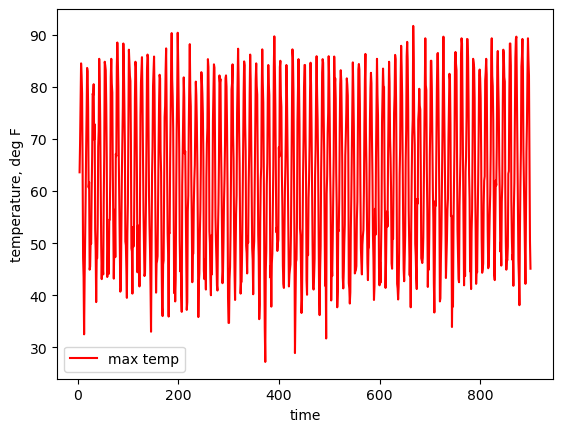

In [ ]:
#  Make a figure and plot the maximumT data that you assigned to a variable in 
#  the previous cell. Feel free to copy and paste code from previous notebooks
#  (such as statistical_moments) where we made figures. 
#  Do not set any x-limits or y-limits at this stage.

fig = plt.figure()

plt.plot(max_temp, color='red', label='max temp')
plt.xlabel('time')
plt.ylabel('temperature, deg F')
plt.legend()
plt.show()